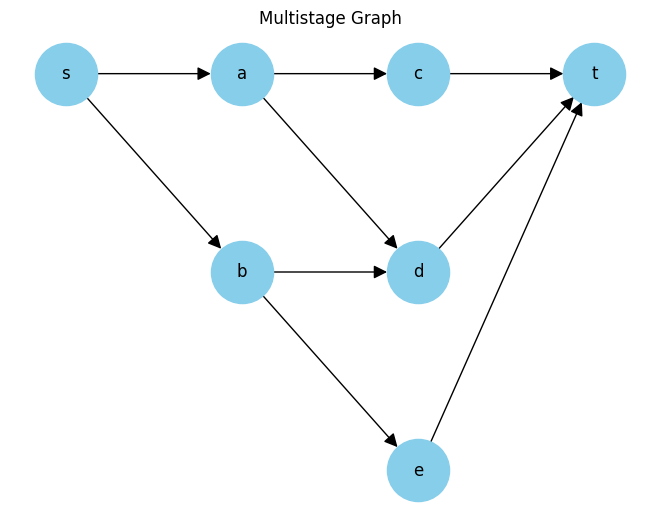

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes by stages
stages = {
    0: ['s'],                   # Start
    1: ['a', 'b'],              # Stage 1
    2: ['c', 'd', 'e'],         # Stage 2
    3: ['t']                    # End
}

# Add nodes with stage information

pos = {}
for stage, nodes in stages.items():
    for i, node in enumerate(nodes):
        G.add_node(node, stage=stage)
        pos[node] = (stage, -i)  # horizontal: stage, vertical: spacing between nodes 
# Add edges between stages (you can modify these)
edges = [
    ('s', 'a'), ('s', 'b'),
    ('a', 'c'), ('a', 'd'),
    ('b', 'd'), ('b', 'e'),
    ('c', 't'), ('d', 't'), ('e', 't')
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, arrowsize=20)
plt.title("Multistage Graph")
plt.axis('off')
plt.show()


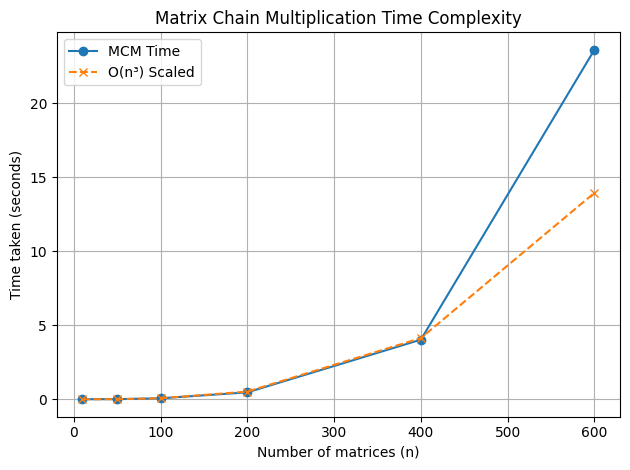

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Matrix Chain Multiplication (Bottom-Up DP)
def matrix_chain_order(p):
    n = len(p) - 1
    m = [[0] * n for _ in range(n)]
    for L in range(2, n+1):
        for i in range(n-L+1):
            j = i + L - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                q = m[i][k] + m[k+1][j] + p[i]*p[k+1]*p[j+1]
                if q < m[i][j]:
                    m[i][j] = q
    return m[0][n-1]

# Experiment
sizes = [10, 50, 100, 200, 400, 600]  # number of matrices (not size of matrices!)
times = []

for n in sizes:
    dims = [np.random.randint(5, 50) for _ in range(n + 1)]
    start = time.time()
    matrix_chain_order(dims)
    end = time.time()
    times.append(end - start)
scaled_theory = [(x**3) / (sizes[2]**3) * times[2] for x in sizes]

# Plotting
plt.plot(sizes, times, 'o-', label='MCM Time')
plt.plot(sizes, scaled_theory, 'x--', label='O(n³) Scaled')

plt.xlabel('Number of matrices (n)')
plt.ylabel('Time taken (seconds)')
plt.title('Matrix Chain Multiplication Time Complexity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


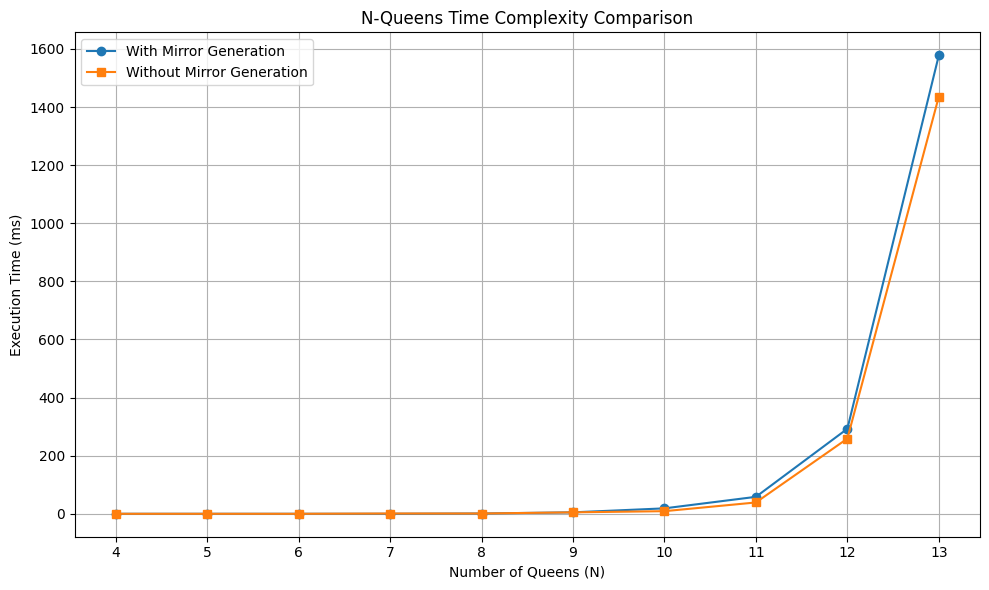

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data
df = pd.read_csv('nqueen_times.csv')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['N'], df['Time_With_Mirror'], marker='o', label='With Mirror Generation')
plt.plot(df['N'], df['Time_Without_Mirror'], marker='s', label='Without Mirror Generation')

# Labels and Title
plt.title('N-Queens Time Complexity Comparison')
plt.xlabel('Number of Queens (N)')
plt.ylabel('Execution Time (ms)')
plt.grid(True)
plt.legend()
plt.xticks(df['N'])

# Show the plot
plt.tight_layout()
plt.show()



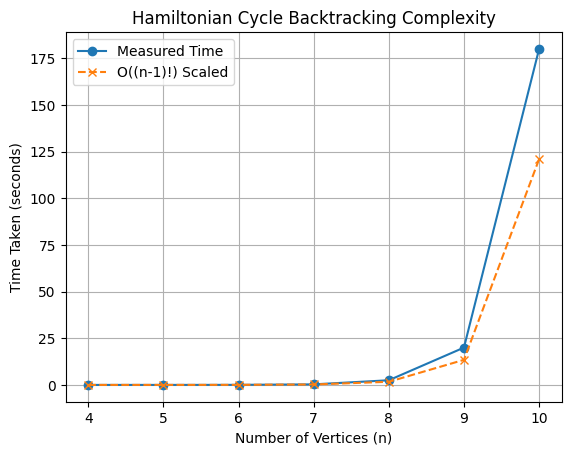

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Sample sizes (number of vertices)
size = np.array([4, 5, 6, 7, 8, 9, 10])
# Hypothetical timing data in seconds (replace with actual measurements if available)
time = np.array([0.001, 0.005, 0.04, 0.3, 2.5, 20.0, 180.0])  # Example data

# Scale O((n-1)!) to match time data for visual comparison
i = 2  # Choose a reference index for scaling
scale_factor = time[i] / math.factorial(size[i] - 1)
factorial_time = np.array([math.factorial(n - 1) * scale_factor for n in size])

# Plotting
plt.plot(size, time, 'o-', label="Measured Time")
plt.plot(size, factorial_time, 'x--', label='O((n-1)!) Scaled')
plt.title("Hamiltonian Cycle Backtracking Complexity")
plt.xlabel('Number of Vertices (n)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()


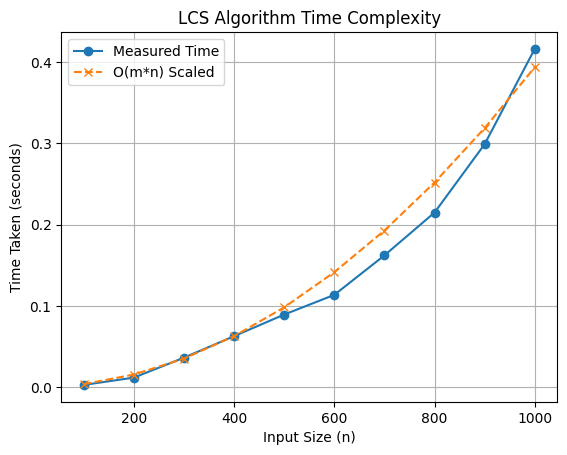

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

def lcs(a, b):
    m = len(a)
    n = len(b)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                dp[i][j] = 0
            elif a[i - 1] == b[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

# Generate random strings and measure time for different sizes
sizes = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
times = []

for size in sizes:
    a = ''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), size=size*10))
    b = ''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), size=size*10))
    
    start_time = time.time()
    lcs(a, b)
    end_time = time.time()
    
    times.append(end_time - start_time)

# Plot the complexity
idx = 3
plt.plot(sizes*10, times, 'o-', label="Measured Time")
plt.plot(sizes*10, (sizes ** 2) * times[idx] / (sizes[idx] ** 2), 'x--', label='O(m*n) Scaled')
plt.title("LCS Algorithm Time Complexity")
plt.xlabel('Input Size (n)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()
